In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# There're two dataframes, dfpercent is more important. Disregard dfcopysqkm
# dfpercent = percent forest growth per country
# dfcopysqkm = Square kilometers forest growth per country.

In [3]:
dfsqkm = pd.read_csv('Global_Forest_SQKM.csv', encoding = 'iso-8859-1')

dfpercent = pd.read_csv('Global_Forest_Percentage.csv', encoding = 'iso-8859-1')


dfcopysqkm = dfsqkm.copy()



dfcopysqkm.drop([0, 1, 2])
del dfcopysqkm['Unnamed: 3']

dfcopysqkm = dfcopysqkm.drop([0, 1, 2])



columnnames = []

for i in range(62):
    columnnames.append(dfcopysqkm.iloc[0,i])
    
    

dfcopysqkm = dfcopysqkm.rename(columns = {'Data Source': 'Country Name', 'World Development Indicators': 'Country Code'})

for i in range(2,62):
    try:
        dfcopysqkm = dfcopysqkm.rename(columns = {'Unnamed: ' + str(i): dfcopysqkm.iloc[0,i-1]})
    except IndexError:
        break
#     print(f"Unnamed: {str(i)}")

# for i in range(2,62):
#     print(i)

dfcopysqkm
# Debug Statements:
# ~~~~~~~~~~~~~~~~~~
 
# dfcopy.describe()
# dfcopy.shape


,Country Name,Country Code,Country Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,Unnamed: 62
3,Country Name,Country Code,Indicator Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2017.0,2018.0
4,Aruba,ABW,Forest area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.200000e+00,4.200000e+00,4.200000e+00,4.200000e+00,4.200000e+00,4.200000e+00,4.200000e+00,4.200000e+00,NaN,NaN
5,Afghanistan,AFG,Forest area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,NaN,NaN
6,Angola,AGO,Forest area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.860480e+05,5.848000e+05,5.835520e+05,5.823040e+05,5.810560e+05,5.798080e+05,5.785600e+05,5.773120e+05,NaN,NaN
7,Albania,ALB,Forest area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.775200e+03,7.763000e+03,7.753400e+03,7.743800e+03,7.734200e+03,7.724600e+03,7.715000e+03,7.705400e+03,NaN,NaN
8,Andorra,AND,Forest area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,NaN,NaN
9,Arab World,ARB,Forest area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.924115e+05,1.931225e+05,3.915070e+05,3.890714e+05,3.866358e+05,3.842002e+05,3.817646e+05,3.793290e+05,NaN,NaN
10,United Arab Emirates,ARE,Forest area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.162400e+03,3.173000e+03,3.183600e+03,3.194200e+03,3.204800e+03,3.215400e+03,3.226000e+03,3.236600e+03,NaN,NaN
11,Argentina,ARG,Forest area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.891400e+05,2.859600e+05,2.829920e+05,2.800240e+05,2.770560e+05,2.740880e+05,2.711200e+05,2.681520e+05,NaN,NaN
12,Armenia,ARM,Forest area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.312000e+03,3.310000e+03,3.312000e+03,3.314000e+03,3.316000e+03,3.318000e+03,3.320000e+03,3.322000e+03,NaN,NaN


In [14]:
# Stripping white space for Country Name Columns

for i in range(len(dfpercent)):
    
    dfpercent.iloc[i,0].strip()

dfpercent

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,NaN,NaN
2,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,47.007942,46.907837,46.807732,46.707627,46.607525,46.507420,46.407315,46.307210,NaN,NaN
3,Albania,ALB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.376643,28.332116,28.297081,28.262044,28.227007,28.191972,28.156934,28.121897,NaN,NaN
4,Andorra,AND,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,NaN,NaN
5,Arab World,ARB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.712939,1.719270,1.713113,1.706957,1.700830,1.694675,1.688517,1.682361,NaN,NaN
6,United Arab Emirates,ARE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.452830,4.467755,4.482681,4.497606,4.512532,4.527457,4.542383,4.557308,NaN,NaN
7,Argentina,ARG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.565318,10.449119,10.340667,10.232215,10.123762,10.015311,9.906858,9.798406,NaN,NaN
8,Armenia,ARM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.633299,11.626273,11.633299,11.640323,11.647348,11.654373,11.661398,11.668423,NaN,NaN
9,American Samoa,ASM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.750000,88.549995,88.400002,88.199997,88.050003,87.900000,87.700005,87.500000,NaN,NaN


In [5]:
len(dfpercent)

264

In [13]:
filepath = "online-data-chapter-2-whr-2017.xlsx"

df_gh = pd.ExcelFile(filepath)

df_gh.sheet_names

df_happinessindex = df_gh.parse('Figure2.2 WHR 2017')

df_happinessindex = df_happinessindex.rename(columns = {"Country" : "Country Name"})

df_happinessindex['Country Name'] = df_happinessindex['Country Name']

# Stripping White Space for Country Name column

for i in range(len(df_happinessindex)):
    
    df_happinessindex.iloc[i,0].strip()
    


df_happinessindex.head(len(df_happinessindex))

,Country Name,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual
0,Norway,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [19]:
df_forest_happiness = pd.merge(dfpercent, df_happinessindex, on = "Country Name", how = "inner")

df_forest_happiness.head(len(df_forest_happiness))

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual
0,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
1,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
2,Albania,ALB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
3,United Arab Emirates,ARE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.648,6.722047,6.573952,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704
4,Argentina,ARG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
5,Armenia,ARM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.376,4.466735,4.285265,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499
6,Australia,AUS,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
7,Austria,AUT,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506
8,Azerbaijan,AZE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.234,5.299287,5.168714,1.153602,1.152400,0.540776,0.398156,0.045269,0.180988,1.762482
9,Burundi,BDI,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [20]:
df_forest_happiness.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Happiness score',
       'Whisker-high', 'Whisker-low', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia (1.85) + residual'],
      dtype='object')

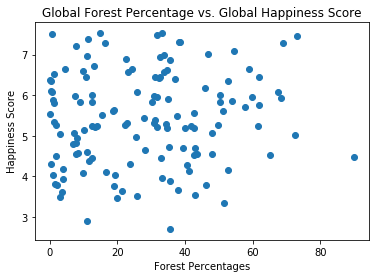

In [21]:
plt.scatter(df_forest_happiness['2016'], df_forest_happiness['Happiness score'])
plt.title("Global Forest Percentage vs. Global Happiness Score")
plt.xlabel('Forest Percentages')
plt.ylabel('Happiness Score')

plt.show()

In [ ]:
# I guess no correlation...